<a href="https://colab.research.google.com/github/steping1/cyber-security-project/blob/main/DataMiningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
'Colab Notebooks'  'Edge-IIoTset dataset'
'Attack traffic'  'Normal traffic'  'Selected dataset for ML and DL'
DNN-EdgeIIoT-dataset.csv  ML-EdgeIIoT-dataset.csv


<ipython-input-1-4fbec7475704>:17: DtypeWarning: Columns (3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Eğitim setindeki doğruluk: 0.87
Test setindeki doğruluk: 0.87
Anomaliler (Attack_label = 1):
        arp.hw.size  arp.opcode  dns.qry.name  dns.qry.qu  dns.qry.type  \
23552     -0.100375   -0.094772     -0.080974   -0.033762           0.0   
31814     -0.100375   -0.094772     -0.080974   -0.033762           0.0   
105455    -0.100375   -0.094772     -0.080974   -0.033762           0.0   
154614    -0.100375   -0.094772     -0.080974   -0.033762           0.0   
75838     -0.100375   -0.094772     -0.080974   -0.033762           0.0   
...             ...         ...           ...         ...           ...   
32008     -0.100375   -0.094772     -0.080974   -0.033762           0.0   
12537     -0.100375   -0.094772     -0.080974   -0.033762           0.0   
68482     -0.100375   -0.094772     -0.080974   -0.033762           0.0   
47316     -0.100375   -0.094772     -0.080974   -0.033762           0.0   
102327    -0.100375   -0.094772     -0.080974   -0.033762           0.0   

      

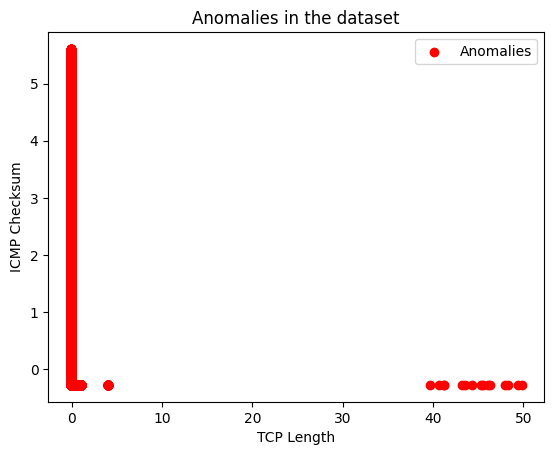

Toplam anomali sayısı: 30509
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00      4985
           1       0.87      0.99      0.93     26575

    accuracy                           0.84     31560
   macro avg       0.29      0.33      0.31     31560
weighted avg       0.73      0.84      0.78     31560



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

              precision    recall  f1-score   support

          -1       0.00      1.00      0.00         0
           0       1.00      0.00      0.00      4985
           1       0.87      0.99      0.93     26575

    accuracy                           0.84     31560
   macro avg       0.62      0.66      0.31     31560
weighted avg       0.89      0.84      0.78     31560



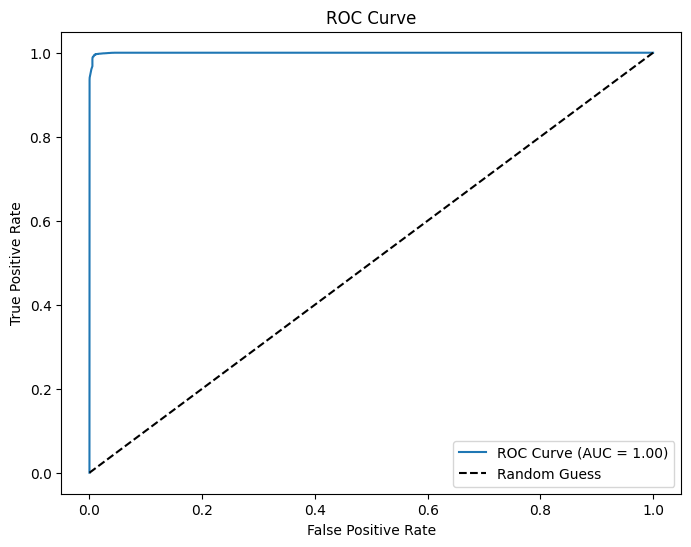

ROC-AUC Score: 1.00
Cross-Validation Accuracy Scores:  [0.98719899 0.99496198 0.98618504 0.99315589 0.99340938]
Mean Accuracy:  0.9909822560202789
Standard Deviation:  0.0035715592588340624


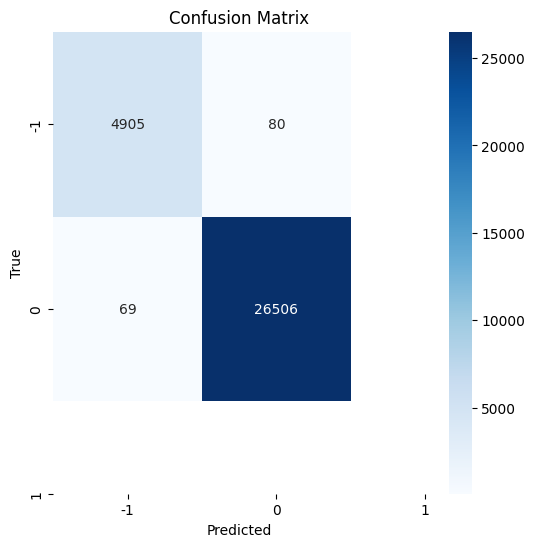

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4985
           1       1.00      1.00      1.00     26575

    accuracy                           1.00     31560
   macro avg       0.99      0.99      0.99     31560
weighted avg       1.00      1.00      1.00     31560

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4985
           1       1.00      1.00      1.00     26575

    accuracy                           1.00     31560
   macro avg       0.99      0.99      0.99     31560
weighted avg       1.00      1.00      1.00     31560

Confusion Matrix:
 [[ 4905    80]
 [   69 26506]]
ROC-AUC Score: 1.00
Normal sayısı: 4985
Anomali sayısı: 26575


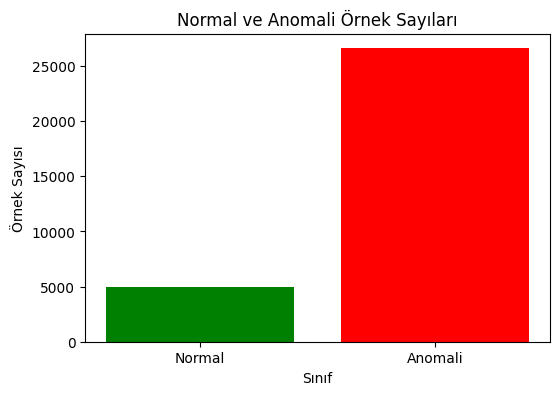

Eğitim süresi: 11.3791 saniye
Test süresi: 0.3646 saniye
Doğruluk: 0.9953


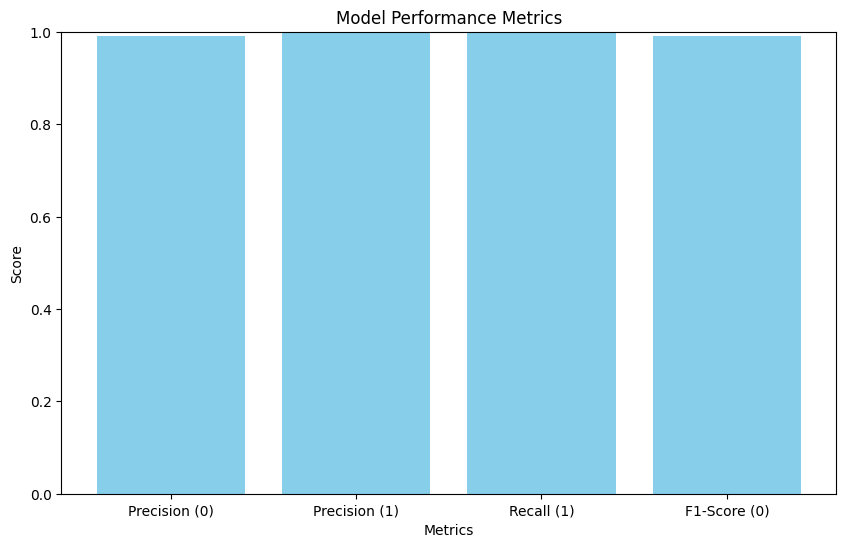

Accuracy: 1.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!ls /content/drive/My\ Drive

!ls '/content/drive/My Drive/Edge-IIoTset dataset'


!ls '/content/drive/My Drive/Edge-IIoTset dataset/Selected dataset for ML and DL'

import pandas as pd

# Dosya yolunu belirt
file_path = '/content/drive/My Drive/Edge-IIoTset dataset/Selected dataset for ML and DL/ML-EdgeIIoT-dataset.csv'

# CSV dosyasını yükle
data = pd.read_csv(file_path)

# Veri setini inceleyelim
data.head()

# Eksik verileri kontrol et
missing_values = data.isnull().sum()
missing_values[missing_values > 0]  # Sadece eksik değeri olan sütunları göster

# Eksik verileri silme işlemi
data_cleaned = data.dropna()  # Eksik verileri içeren satırları silelim

# Veya eksik verileri ortalama ile dolduralım
# data_cleaned = data.fillna(data.mean())  # Eksik verileri ortalama ile doldur

# Temizlenmiş veriyi kontrol edelim
data_cleaned.head()

from sklearn.preprocessing import StandardScaler

# Sayısal verileri seçelim
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Attack_label ve Attack_type sütunlarını normalleştirmeye dahil etmiyoruz
numerical_columns = numerical_columns.difference(['Attack_label', 'Attack_type'])

# Normalleştirici uygulayalım
scaler = StandardScaler()
data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

# Normalleştirilmiş veriyi kontrol edelim
data_cleaned.head()


from sklearn.model_selection import train_test_split

# Özellikler (X) ve etiketler (y)
X = data_cleaned[numerical_columns]  # Normalleştirilmiş sayısal veriler
y = data_cleaned['Attack_label']  # Anomali etiketleri (1 MITM, 0 Normal)

# Eğitim ve test verilerini ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eğitim ve test verilerinin boyutlarını kontrol edelim
X_train.shape, X_test.shape

from sklearn.ensemble import IsolationForest

# Isolation Forest modelini başlat
model = IsolationForest(contamination=0.05, random_state=42)  # %5'lik bir anomali oranı tahmin ediyorum

# Modeli eğitim verisiyle eğitelim
model.fit(X_train)

# Eğitim verisindeki anomalileri tahmin edelim
train_anomalies = model.predict(X_train)

# Test verisindeki anomalileri tahmin edelim
test_anomalies = model.predict(X_test)

# Anomalileri kontrol edelim
train_anomalies_data = X_train[train_anomalies == -1]  # -1, anomaliyi gösterir
test_anomalies_data = X_test[test_anomalies == -1]  # -1, anomaliyi gösterir

# Eğitim ve test verilerindeki anomalileri görüntüleyelim
train_anomalies_data.head(), test_anomalies_data.head()


from sklearn.ensemble import IsolationForest

# Isolation Forest modelini oluştur
model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

# Modeli eğitim verisiyle eğit
model.fit(X_train)

# Eğitim verisi üzerinde tahmin yap
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# -1 anomali, 1 ise normal olarak kabul edilir
# Sonuçları dönüştürüp yeni bir sütun olarak ekleyelim
y_train_pred = [1 if pred == 1 else 0 for pred in y_train_pred]  # Normal: 1, Anomaliler: 0
y_test_pred = [1 if pred == 1 else 0 for pred in y_test_pred]

# Eğitim ve test setleri üzerinde doğruluğu değerlendirelim
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Eğitim setindeki doğruluk: {train_accuracy:.2f}")
print(f"Test setindeki doğruluk: {test_accuracy:.2f}")

# Model ile tahminler yapalım
y_pred = model.predict(X_test)

# Anomali etiketlerine sahip (Attack_label = 1) verileri filtreleyelim
anomalies = X_test[y_pred == 1]

# Anomali verilerini yazdıralım
print("Anomaliler (Attack_label = 1):")
print(anomalies)


import matplotlib.pyplot as plt

# Anomalilerin belirli özellikleri üzerinden görselleştirme
plt.scatter(anomalies['tcp.len'], anomalies['icmp.checksum'], color='red', label='Anomalies')
plt.xlabel('TCP Length')
plt.ylabel('ICMP Checksum')
plt.title('Anomalies in the dataset')
plt.legend()
plt.show()

print(f"Toplam anomali sayısı: {anomalies.shape[0]}")


from sklearn.metrics import classification_report

# Modelin performansını inceleyin
print(classification_report(y_test, y_pred))


from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight={0: 1, 1: 5})
model.fit(X_train, y_train)

from sklearn.metrics import classification_report

# Zero division parametresini 1 olarak ayarlıyoruz
print(classification_report(y_test, y_pred, zero_division=1))


from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# ROC-AUC hesaplama
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Anomali sınıfının (1) olasılıkları
roc_auc = roc_auc_score(y_test, y_pred_prob)

# ROC Curve görselleştirme
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f'ROC-AUC Score: {roc_auc:.2f}')

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Random Forest modelini tanımlayalım
model = RandomForestClassifier(class_weight='balanced')

# K-Fold Cross-Validation uygulayalım
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # cv=5: 5-fold cross-validation

# Sonuçları yazdıralım
print("Cross-Validation Accuracy Scores: ", cv_scores)
print("Mean Accuracy: ", cv_scores.mean())
print("Standard Deviation: ", cv_scores.std())


# Modeli eğitim verisi ile eğitelim
model.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier

# Random Forest modelini oluşturuyoruz
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Modeli eğitim verisi ile eğitiyoruz
model.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Modelin tahminlerini yapalım
y_pred = model.predict(X_test)

# Confusion Matrix hesaplayalım
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix'i görselleştirelim
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report'u yazdıralım
print(classification_report(y_test, y_pred))



# Modelin tahminlerini yapalım (MITM test verisi üzerinde)
y_pred_mitm = model.predict(X_test)

# Karışıklık Matrisi hesaplayalım
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_mitm)

# Precision, Recall, F1-Score ve ROC-AUC skorlarını hesaplayalım
from sklearn.metrics import classification_report, roc_auc_score

print("Classification Report:\n", classification_report(y_test, y_pred_mitm))
print("Confusion Matrix:\n", conf_matrix)

# ROC-AUC skoru
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print(f"ROC-AUC Score: {roc_auc:.2f}")


import matplotlib.pyplot as plt

# Anomali ve normal etiketlerini alalım
normal_count = (y_test == 0).sum()  # Normal etiket sayısı (0)
anomaly_count = (y_test == 1).sum()  # Anomali etiket sayısı (1)

# Sayısal olarak yazdıralım
print(f"Normal sayısı: {normal_count}")
print(f"Anomali sayısı: {anomaly_count}")

# Grafik çizelim
labels = ['Normal', 'Anomali']
counts = [normal_count, anomaly_count]

# Bar chart ile gösterelim
plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=['green', 'red'])
plt.xlabel('Sınıf')
plt.ylabel('Örnek Sayısı')
plt.title('Normal ve Anomali Örnek Sayıları')
plt.show()



import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Veri setini yükleyin (X = özellikler, y = etiketler)
# X, y veri setinizin özellikleri ve etiketlerini temsil etmektedir
# X = verinizin özellikleri
# y = etiketleriniz

# Eğitim ve test verilerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modeli başlatma (örneğin RandomForest)
model = RandomForestClassifier(random_state=42)

# Eğitim süresini ölçme
start_train_time = time.time()
model.fit(X_train, y_train)  # Modeli eğitme
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Test süresini ölçme
start_test_time = time.time()
y_pred = model.predict(X_test)  # Test verisi üzerinde tahmin yapma
end_test_time = time.time()
test_time = end_test_time - start_test_time

# Sonuçları yazdırma
print(f"Eğitim süresi: {train_time:.4f} saniye")
print(f"Test süresi: {test_time:.4f} saniye")

# Model performansı değerlendirme (örneğin doğruluk)
accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk: {accuracy:.4f}")


import matplotlib.pyplot as plt

# Metrikler
metrics = [0.99, 1.00, 1.00, 0.99]
metric_names = ['Precision (0)', 'Precision (1)', 'Recall (1)', 'F1-Score (0)']

# Grafik çizme
plt.figure(figsize=(10, 6))
plt.bar(metric_names, metrics, color='skyblue')
plt.title('Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

# Accuracy göstergesi
accuracy = 1.00
print(f"Accuracy: {accuracy}")











ıot dataset datamining project
